In [1]:
from train import train
from diffusers import DDPMPipeline
import matplotlib.pyplot as plt


/home/admin/miniconda3/envs/pytorch/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Repo card metadata block was not found. Setting CardData to empty.


In [2]:
losses, model, noise_scheduler = train()

/home/admin/miniconda3/envs/pytorch/lib/python3.13/site-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


Epoch:5, loss: 0.11000425042584538
Epoch:10, loss: 0.09109054505825043
Epoch:15, loss: 0.07191775157116354
Epoch:20, loss: 0.06335158552974463
Epoch:25, loss: 0.05682952981442213
Epoch:30, loss: 0.05364331416785717


In [4]:
image_pipe = DDPMPipeline(unet=model, scheduler=noise_scheduler)

100%|██████████| 1000/1000 [00:07<00:00, 141.83it/s]


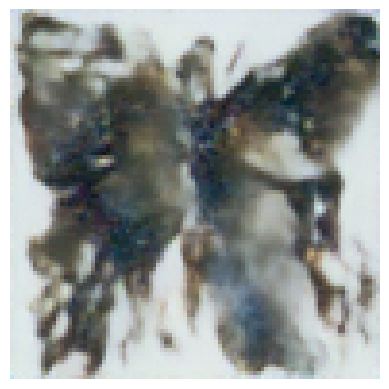

In [7]:
import datetime

pipeline_output = image_pipe()
output = pipeline_output.images[0]
plt.imshow(output)
plt.axis('off')
plt.savefig(f'output-{datetime.datetime.now().isoformat("T", "milliseconds")}.png', bbox_inches='tight')